In [1]:
using Plots

In [58]:
n = 10
A = randn(n,n); A = A'*A
x = randn(n)
b = A*x;

In [51]:
function matvec(x)
    A*x
end;

In [59]:
x = zeros(n)
err = []
for i = 1:1000
   g = A*x - b
    α = dot(g,g) / dot(g,A*g)
    x = x - α*g
    push!(err,norm(g))
end


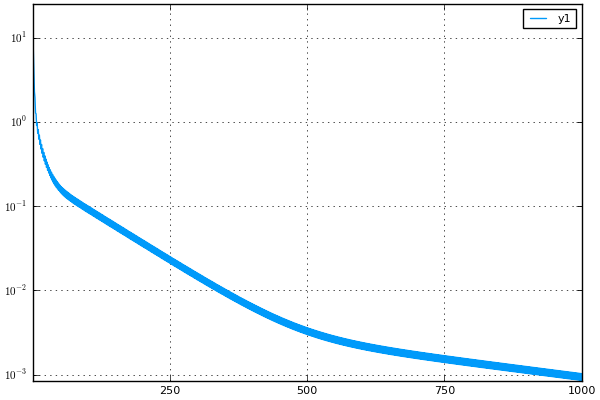

In [60]:
plot(err,yscale=:log10)